In [1]:
import requests
import matplotlib.pyplot as plt
import json

In [13]:
import pandas as pd
import time

iss_data = []
i = 0

while(i<100):
    i += 1
    message = requests.get("http://api.open-notify.org/iss-now.json")
    info = message.text
    dp = json.loads(info)

    iss_data.append((dp["timestamp"], dp["iss_position"]["longitude"], dp["iss_position"]["latitude"]))
    time.sleep(10)
    
tracker = pd.DataFrame(iss_data, columns = ["Timestamp", "Longitude", "Latitude"])

tracker

,Timestamp,Longitude,Latitude
0,1658399086,127.4987,46.2776
1,1658399097,128.3447,46.5736
2,1658399107,129.2006,46.8628
3,1658399118,130.0659,47.1448
4,1658399128,130.9411,47.4195
...,...,...,...
95,1658400120,-145.3973,34.2382
96,1658400130,-144.8267,33.7871
97,1658400141,-144.2627,33.3331
98,1658400151,-143.7050,32.8761


In [3]:
tracker.to_csv("iss-data.csv")
tracker = pd.read_csv("iss-data.csv")

tracker

,Unnamed: 0,Timestamp,Longitude,Latitude
0,0,1658389892,-61.2227,-10.2591
1,1,1658389903,-60.8310,-10.7857
2,2,1658389913,-60.4567,-11.2866
3,3,1658389923,-60.0619,-11.8121
4,4,1658389934,-59.6655,-12.3368
...,...,...,...,...
95,95,1658390886,-3.7522,-49.8619
96,96,1658390896,-2.7795,-50.0400
97,97,1658390907,-1.7996,-50.2092
98,98,1658390917,-0.8125,-50.3692


In [14]:
x = tracker["Longitude"]
x

0      127.4987
1      128.3447
2      129.2006
3      130.0659
4      130.9411
        ...    
95    -145.3973
96    -144.8267
97    -144.2627
98    -143.7050
99    -143.1535
Name: Longitude, Length: 100, dtype: object

In [5]:
y = tracker["Latitude"]
y

0    -10.2591
1    -10.7857
2    -11.2866
3    -11.8121
4    -12.3368
       ...   
95   -49.8619
96   -50.0400
97   -50.2092
98   -50.3692
99   -50.5201
Name: Latitude, Length: 100, dtype: float64

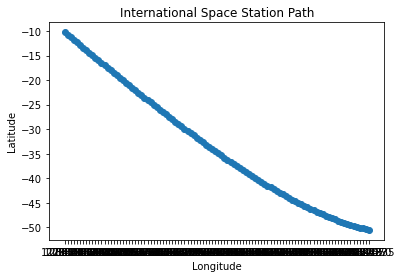

In [15]:
plt.scatter(x, y)
plt.title("International Space Station Path")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()